In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 전처리
x_train = x_train.reshape(-1, 28*28) / 255.0
x_test = x_test.reshape(-1, 28*28) / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
class MLP:
  def __init__(self, input_size, hidden_size, output_size):
    self.W1 = np.random.randn(input_size,hidden_size) * .01
    self.b1 = np.zeros((1,hidden_size))
    self.W2 = np.random.randn(hidden_size,output_size) * .01
    self.b2 = np.zeros((1,output_size))

  def relu(self,z):
    return np.maximum(0,z)

  def relu_derivative(self, z):
    return (z > 0).astype(float)

  def forward(self, X):
    self.Z1 = np.dot(X, self.W1) + self.b1
    self.A1 = self.relu(self.Z1)
    self.Z2 = np.dot(self.A1, self.W2) + self.b2
    return self.Z2

  def softmax(self, z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

  def compute_loss(self, y_pred, y_true):
    m = y_true.shape[0]
    log_likelihood = -np.log(y_pred[range(m), y_true])
    return np.sum(log_likelihood) / m

  def backward(self, X, y_true, learning_rate=0.01):
    m = X.shape[0]
    y_pred = self.softmax(self.Z2)
    # 손실의 그래디언트
    y_pred[range(m), y_true] -= 1
    y_pred /= m

    # 가중치 업데이트
    dW2 = np.dot(self.A1.T, y_pred)
    db2 = np.sum(y_pred, axis=0, keepdims=True)

    dA1 = np.dot(y_pred, self.W2.T)
    dZ1 = dA1 * self.relu_derivative(self.Z1)

    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # 가중치 갱신
    self.W2 -= learning_rate * dW2
    self.b2 -= learning_rate * db2
    self.W1 -= learning_rate * dW1
    self.b1 -= learning_rate * db1

  def train(self, X, y, epochs=1000, learning_rate=0.01):
    for epoch in range(epochs):
      self.forward(X)
      self.backward(X, y, learning_rate)
      if epoch % 100 == 0:
        loss = self.compute_loss(self.softmax(self.Z2), y)
        print(f'Epoch {epoch}, Loss: {loss}')

  def predict(self, X):
    logits = self.forward(X)
    return np.argmax(self.softmax(logits), axis=1)


In [ ]:
# MLP 모델 인스턴스 생성
mlp = MLP(input_size=28*28, hidden_size=128, output_size=10)

# 모델 학습
mlp.train(x_train, y_train, epochs=1000, learning_rate=0.01)

# 테스트 데이터로 예측
y_pred = mlp.predict(x_test)

# 정확도 평가
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


Epoch 0, Loss: 2.30271909683334
Epoch 100, Loss: 2.2905035213504075
Epoch 200, Loss: 2.267653738627232
Epoch 300, Loss: 2.218538579113052
Epoch 400, Loss: 2.1195087562826838
Epoch 500, Loss: 1.9479000941499705
Epoch 600, Loss: 1.7082852330186282
Epoch 700, Loss: 1.4489135964880073
Epoch 800, Loss: 1.2242768929621948
Epoch 900, Loss: 1.052162650632582
Accuracy: 79.98%


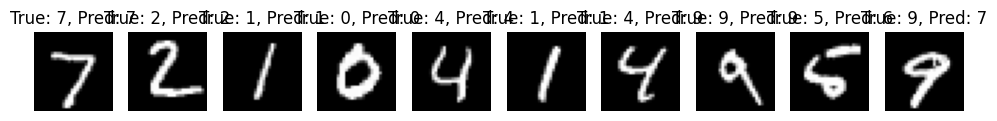

In [ ]:
# 예시 이미지와 예측 결과 시각화
def plot_mnist_examples(X, y_true, y_pred, n=10):
    plt.figure(figsize=(12, 4))
    for i in range(n):
        plt.subplot(2, n, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f'True: {y_true[i]}, Pred: {y_pred[i]}')
        plt.axis('off')
    plt.show()

plot_mnist_examples(x_test, y_test, y_pred)


# torch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 전처리
x_train = x_train.reshape(-1, 28*28) / 255.0
x_test = x_test.reshape(-1, 28*28) / 255.0


# 이진 분류가 아닌 다중 클래스 분류를 위한 PyTorch 텐서로 변환합니다.
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)  # 정수 레이블로 변환
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# TensorDataset을 사용하여 x와 y를 묶어서 DataLoader에 전달합니다.
train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class MLP(nn.Module):
  def __init__(self, input_dim, hidden_dim,output_dim):
    super(MLP,self).__init__()

    self.layer1 = nn.Linear(input_dim, hidden_dim)

    self.layer2 = nn.Linear(hidden_dim, hidden_dim)

    self.layer3 = nn.Linear(hidden_dim, output_dim)

    self.relu = nn.ReLU()

  def forward(self, x):

    x = self.relu(self.layer1(x))
    x = self.relu(self.layer2(x))
    x = self.layer3(x)

    return x


In [ ]:
model = MLP(28*28, 256, 10)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10
for epoch in range(num_epochs):
  for images, labels in train_loader:
    output = model(images)
    loss = criterion(output, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/10], Loss: 0.0744
Epoch [2/10], Loss: 0.0391
Epoch [3/10], Loss: 0.0458
Epoch [4/10], Loss: 0.0999
Epoch [5/10], Loss: 0.0307
Epoch [6/10], Loss: 0.0320
Epoch [7/10], Loss: 0.0007
Epoch [8/10], Loss: 0.0027
Epoch [9/10], Loss: 0.2729
Epoch [10/10], Loss: 0.0041


In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the 10,000 test images: {accuracy:.2f}%')


Accuracy of the model on the 10,000 test images: 98.10%


784

AttributeError: 'DataLoader' object has no attribute 'size'